**Dependencies**

In [1]:
import numpy as np
import keras
import pyttsx3
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Reshape
from keras import layers
import matplotlib.pyplot as plt
import os 
import cv2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

**Data Preprocessing**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,  
                                   shear_range = 0.2,  
                                   zoom_range = 0.2,  
                                   horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [3]:
x_train = train_datagen.flow_from_directory(
r"C:\Users\Suma\Desktop\FACE_RECOGNITION\train",
target_size =(40, 40), 
batch_size = 5,
class_mode ='categorical',
color_mode="grayscale",
interpolation="box",
classes=["brother","father","mother","sister","stranger"]
)

Found 981 images belonging to 5 classes.


In [4]:
validation = train_datagen.flow_from_directory(
r"C:\Users\Suma\Desktop\FACE_RECOGNITION\validation_data",
target_size =(40, 40), 
batch_size = 2,
class_mode ='categorical',
color_mode="grayscale",
interpolation="box",
classes=["brother","father","mother","sister","stranger"]
)

Found 111 images belonging to 5 classes.


In [5]:
test = test_datagen.flow_from_directory(
r"C:\Users\Suma\Desktop\FACE_RECOGNITION\test",
target_size =(40, 40), 
batch_size = 2,
class_mode ='categorical',
color_mode="grayscale",
interpolation="box",
classes=["brother","father","mother","sister","stranger"]
)

Found 112 images belonging to 5 classes.


**Visualization**

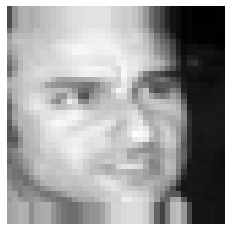

In [6]:
plt.imshow(x_train[0][0][0],cmap="gray")
plt.axis("off")
plt.show()

**CNN Model Architecture**

In [21]:
early_stopping=EarlyStopping(
    patience=25, 
    restore_best_weights=True,
)
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",input_shape=(40,40,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))
model.add(Conv2D(filters=32,kernel_size=5,strides=(1,1),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(Conv2D(filters=20,kernel_size=7,strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(Flatten())
model.add(Dense(5,activation="softmax")) 
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,epochs=200,callbacks=[early_stopping],validation_data=validation,verbose=2) 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 19, 19, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 19, 19, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 19, 19, 32)        25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 9, 9, 32)         

In [22]:
score=model.evaluate(test)
print(score)

56/56 [==============================] - 2s 44ms/step - loss: 0.8088 - accuracy: 0.8571
[0.8088387250900269, 0.8571428656578064]


In [ ]:
model.save("model.h5")

**Testing**

In [25]:
artificialimage=np.zeros((40,40))
image=np.reshape(artificialimage,(1,40,40,1))
new_model=keras.models.load_model("model.h5")
new_model.predict(image)

array([[0.02503403, 0.19614172, 0.04598197, 0.01257027, 0.72027206]],
      dtype=float32)